# Fraud Detection System for JPMorgan Chase
### Complete Machine Learning project based on Supervised, Unsupervised, and Hydrid Model

## About dataset
- JP Morgan and Chase Co is one of the Worlds biggest commercial Bank services, and Financial services Provider. They have covered almost all the countries across the globe. Every day, they can have Millions of Money transactions are happening from there banking services and financial services sector.
- Out of those millions of transactions, they trying to predict and control the fraud transaction rate. Even they are following multifactor authetication, highly encrypted algorithms, and high security models, still they are facing the atleast of 0.0001 fraud rate in there financial and banking transactions.
- As a data scientist we have to predict, pattens in the Historical Transactional data, by using the Supervised, Unsupervised, and Hybrid Machine Learning Models.
- The data set having the 11 columns. Those are **step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud**, and total of 63,62,620 rows. Below is the brief information about the Columns

    - **step: datatype - integer**: The time step or day number when the transaction happened. Usually counts how many days since the start of the data collection.
    - **type: datatype - object**: The kind of transaction — for example, PAYMENT, TRANSFER, or CASH_OUT.
    - **amount: datatype - float**: The total money involved in that transaction.
    - **nameOrig: datatype - object**: The ID (or code) of the account that sent the money.
    - **oldbalanceOrg: datatype - float**: The sender’s account balance before the transaction.
    - **newbalanceOrig: datatype - float**: The sender’s account balance after the transaction.
    - **nameDest: datatype - Object**: The ID (or code) of the account that received the money.
    - **oldbalanceDest: datattype - float**: The receiver’s account balance before the transaction.
    - **newbalanceDest: datatype - float**: The receiver’s account balance after the transaction.
    - **isFraud: datatype - integer**: A flag (0 or 1) showing if the transaction is fraudulent (1 means fraud, 0 means normal).
    - **isFlaggedFraud: datatype - integer**: A system flag (0 or 1) — marks if the transaction was automatically flagged as suspicious by the bank.

# Purpose: 
- The primary goal of this project is to build a robust, scalable, and interpretable fraud detection system using both supervised and unsupervised machine learning techniques. By leveraging behavioral clustering (KMeans), anomaly detection (Isolation Forest), and classification models (Random Forest, XGBoost, Logistic Regression), the system aims to accurately identify fraudulent transactions in a highly imbalanced financial dataset. The final hybrid model integrates multiple perspectives—statistical anomalies, behavioral patterns, and predictive modeling—to enhance fraud detection performance while balancing precision and recall.
- This project also explores model evaluation trade-offs, feature engineering, and the integration of unsupervised insights into supervised pipelines. The solution is designed to be modular, explainable, and adaptable for real-world deployment in financial fraud monitoring systems.

## >> **GOAL of the Project**
### Find the **High Precision, Recall, F1 Score** Machine Learning model with the Very **Lowest False Positives**, and can predict Actual Fraud Transactions

### 1. Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler

# Read the CSV file
file_path = r"C:\Users\SMangal\Downloads\Cap1\Fraud detection JP Morgan\Fraud Detection System for JPMorgan Chase _log.csv"
df = pd.read_csv(file_path)

# Save as Parquet file
parquet_file = "JPMorgan_Dataset.parquet"
df.to_parquet(parquet_file, engine='pyarrow', index=False)

print(f"CSV file is converted to save fast readability using Parquet: {parquet_file}")

df = pd.read_parquet(r"C:\Users\SMangal\Downloads\Cap1\Fraud detection JP Morgan\JPMorgan_Dataset.parquet")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 2. Data Exploring

In [20]:
df.shape

(6362620, 11)

In [22]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [26]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### **Observations**
- Total we have 6.3 Million Rows(approx) with the 11 columns
- in dataframe we have string data columns 3 (type, nameOrig, nameDest) and remaininig all columns are numerical columns

## 3. Data-Preprocessing

### 3.1 Data Cleaning

In [28]:
# Check null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [30]:
# Check duplicate rows in the dataframe
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


### **Observations**
- In our dataset we don't have any null values
- In our dataset we don't have duplicate values/rows also

### 3.2 Check Outliers: using **Boxplot**
**step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest**

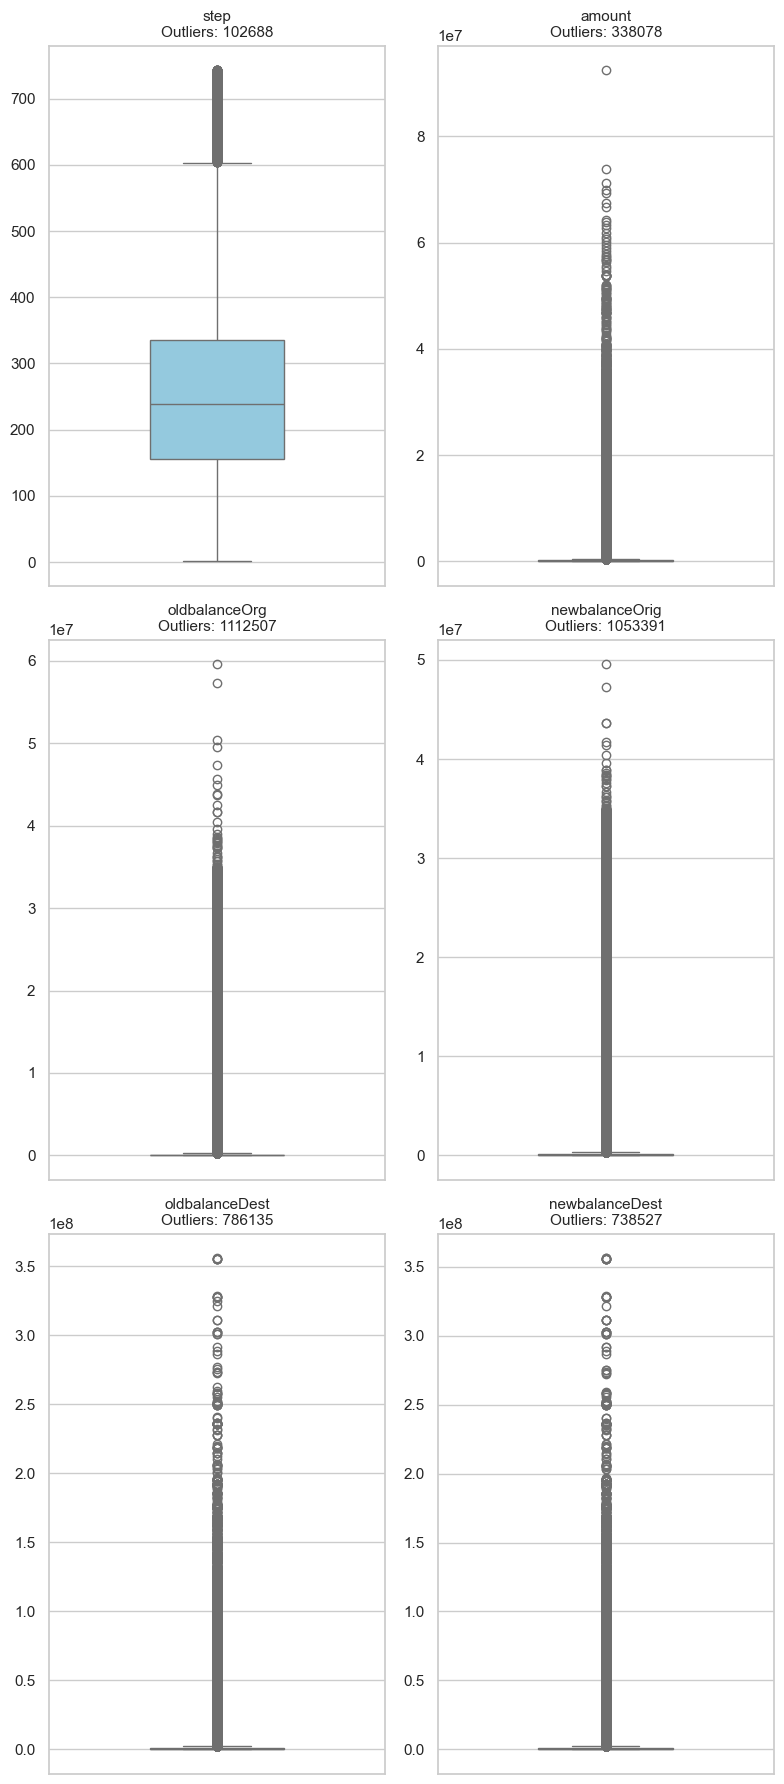

In [32]:
# Check outliers
# Define your numeric columns
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Set seaborn style
sns.set(style="whitegrid")

# Calculate grid size (2 columns)
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create a figure
plt.figure(figsize=(8, 6 * n_rows))

# Loop through numeric columns
for i, col in enumerate(numeric_cols, 1):
    # Calculate IQR and outlier count
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    # Create subplot
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, y=col, color='skyblue', width=0.4)
    plt.title(f'{col}\nOutliers: {outlier_count}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

### **Observations**
- We have done box plot for the following columns
    - **step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest**
- Using Inter Quartile Range (IQR) we have counted number of Outliers in the each column. The count of Outliers per columns as follows
    - **step**: 1,02,688 outliers out of 63,62,620 rows
    - **amount**: 3,38,078 outliers out of 63,62,620 rows
    - **oldbalanceOrg**: 11,12,507 outliers out of 63,62,620 rows
    - **newbalanceOrig**: 10,53,391 outliers out of 63,62,620 rows
    - **oldbalanceDest**: 7,86,135 outliers out of 63,62,620 rows
    - **newbalanceDest**: 7,38,527 outliers out of 63,62,620 rows
- from the above we understand that these columns have extreme outliers

### 3.3 Check simple statistics about data to know
- **Maximum, Minimum, Mean, Median, Standard Deviation, Variance, skewness, and Kurtosis**. so that we understand better about the data

In [34]:
# simple statistics about the data
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Function for checking the simple stats
def data_statistics():
  for col in numeric_cols:
    print(f"The Maximum Value of '{col}' is: {df[col].max()}")
    print(f"The Minimum Value of '{col}' is: {df[col].min()}")
    print(f"The Mean Value of '{col}' is: {df[col].mean()}")
    print(f"The Median Value of '{col}' is: {df[col].median()}")
    print(f"The Standard Deviation of '{col}' is: {df[col].std()}")
    print(f"The Variance of '{col}' is: {df[col].var()}")
    print(f"The Skewness of '{col}' is: {df[col].skew()}")
    print(f"The Kurtosis of '{col}' is: {df[col].kurtosis()}")
    print("________________________________________________")

# Test the Function
data_statistics()

The Maximum Value of 'step' is: 743
The Minimum Value of 'step' is: 1
The Mean Value of 'step' is: 243.39724563151657
The Median Value of 'step' is: 239.0
The Standard Deviation of 'step' is: 142.33197104914032
The Variance of 'step' is: 20258.389982733323
The Skewness of 'step' is: 0.37517688846984765
The Kurtosis of 'step' is: 0.3290705550254467
________________________________________________
The Maximum Value of 'amount' is: 92445516.64
The Minimum Value of 'amount' is: 0.0
The Mean Value of 'amount' is: 179861.90354913071
The Median Value of 'amount' is: 74871.94
The Standard Deviation of 'amount' is: 603858.2314629931
The Variance of 'amount' is: 364644763705.6137
The Skewness of 'amount' is: 30.99394948249038
The Kurtosis of 'amount' is: 1797.9567053084595
________________________________________________
The Maximum Value of 'oldbalanceOrg' is: 59585040.37
The Minimum Value of 'oldbalanceOrg' is: 0.0
The Mean Value of 'oldbalanceOrg' is: 833883.1040744866
The Median Value of 'ol

### **3.4 Handling Outliers**
- By using Log Transformation we can handle the Outliers

In [36]:
# Apply log transformation
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    df[f'{col}_log'] = np.log1p(df[col])

# Outlier Flagging Using IQR Method
# Non outlier = 0, Outlier = 1
# Create outlier flags
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f'{col}_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

In [38]:
# Get the Output for the above code
print(df[['amount','amount_log','amount_outlier']].head())
print("__________________________________________________")
print(df[['oldbalanceOrg','oldbalanceOrg_log','oldbalanceOrg_outlier']].head())
print("__________________________________________________")
print(df[['newbalanceOrig','newbalanceOrig_log','newbalanceOrig_outlier']].head())
print("__________________________________________________")
print(df[['oldbalanceDest','oldbalanceDest_log','oldbalanceDest_outlier']].head())
print("__________________________________________________")
print(df[['newbalanceDest','newbalanceDest_log','newbalanceDest_outlier']].head())

     amount  amount_log  amount_outlier
0   9839.64    9.194276               0
1   1864.28    7.531166               0
2    181.00    5.204007               0
3    181.00    5.204007               0
4  11668.14    9.364703               0
__________________________________________________
   oldbalanceOrg  oldbalanceOrg_log  oldbalanceOrg_outlier
0       170136.0          12.044359                      0
1        21249.0           9.964112                      0
2          181.0           5.204007                      0
3          181.0           5.204007                      0
4        41554.0          10.634773                      0
__________________________________________________
   newbalanceOrig  newbalanceOrig_log  newbalanceOrig_outlier
0       160296.36           11.984786                       0
1        19384.72            9.872292                       0
2            0.00            0.000000                       0
3            0.00            0.000000                   

In [40]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_log', 'oldbalanceOrg_log',
       'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log',
       'amount_outlier', 'oldbalanceOrg_outlier', 'newbalanceOrig_outlier',
       'oldbalanceDest_outlier', 'newbalanceDest_outlier'],
      dtype='object')

### **Observations**
- The **Log Transformation is helps make data less skewed and reduces the impact of outliers so models can learn patterns more effectively.
- After **Log Transformation** we can see some new columns are created. Those are
  - **'amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log', 'amount_outlier', 'oldbalanceOrg_outlier', 'newbalanceOrig_outlier', 'oldbalanceDest_outlier', 'newbalanceDest_outlier'**
- At last we have seen the head() of newly created column, which showing the none of the Outliers are existed

### 3.5 Plotting the Log Transformation
- We are plotting the Histogram to see the **Data Distribution** before and after the **Log Transformation**

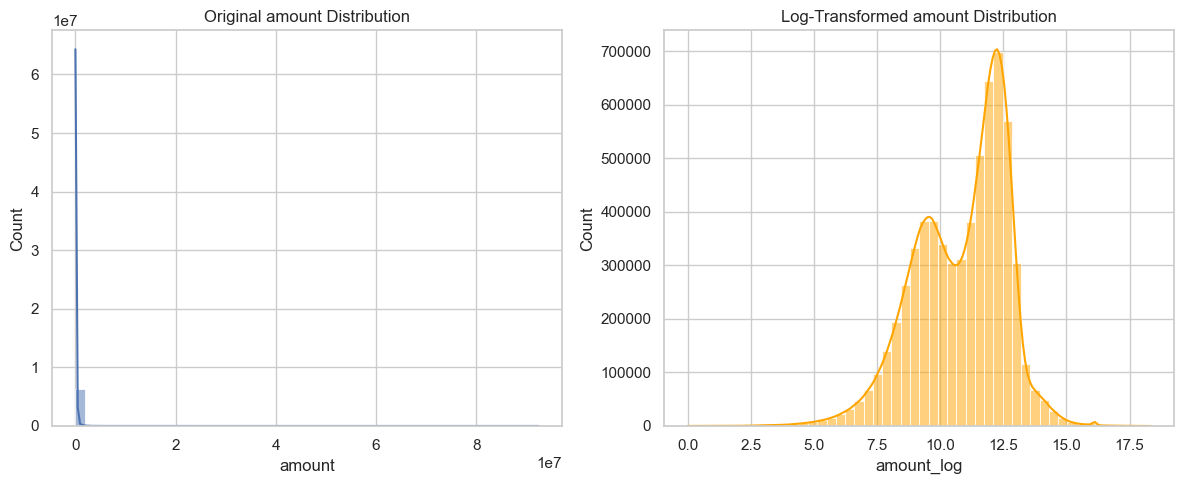

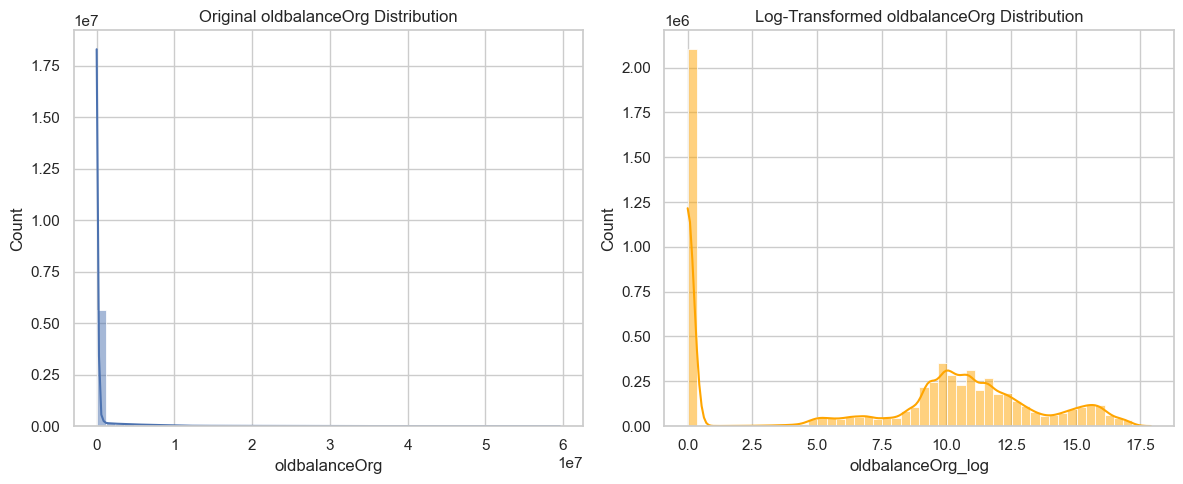

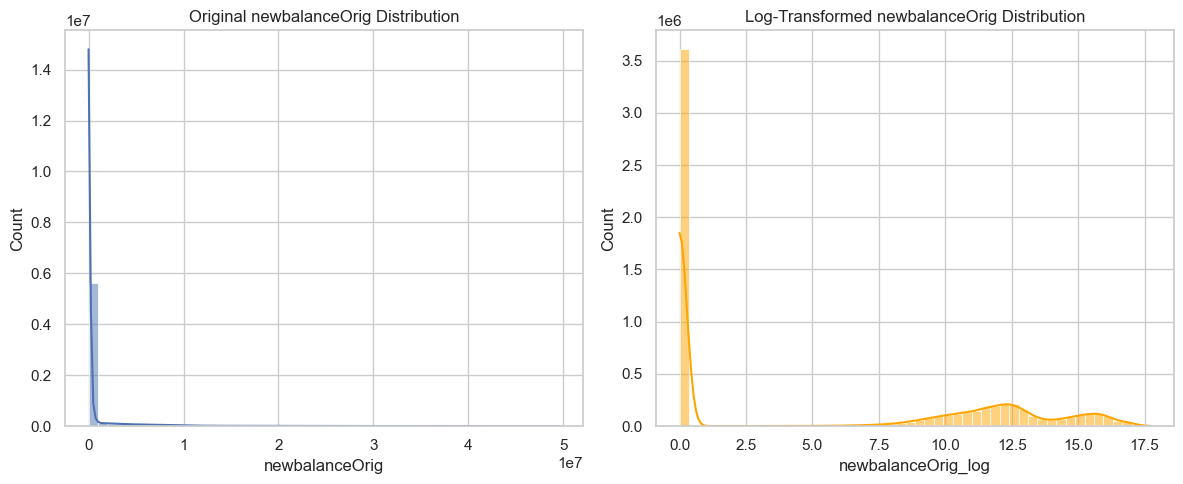

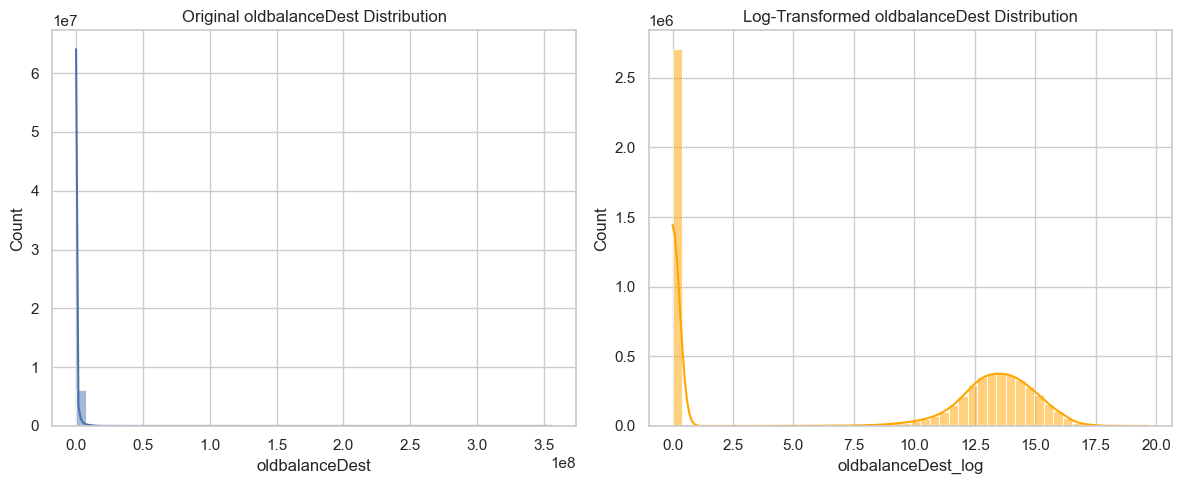

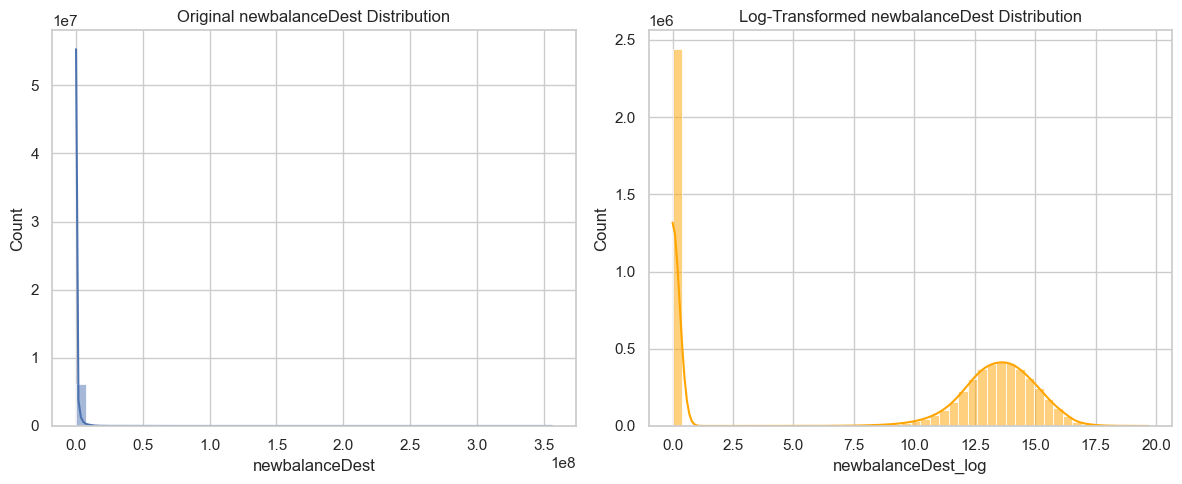

In [42]:
# Now Visualize the Difference between the two Normal column and log transformed values column
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in cols_to_plot:
    plt.figure(figsize=(12, 5))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Original {col} Distribution')

    # Log-transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[f'{col}_log'], bins=50, kde=True, color='orange')
    plt.title(f'Log-Transformed {col} Distribution')

    plt.tight_layout()
    plt.show()

### Observations
-  From the Histogram we can understand
    - Original Columns heavily data distributed towords to the **Right-Skewed** (means right side tail). Most of the values/data is there at left side only. This is before the Log Transformation
    - After the **Log Transformation**, we can see data distribution is adjusted towards to the **Middle/Center**.

### 3.6 Feature Engineering
- From the above we have done **Log transformation**. Now can do **Feature Engineering** using the available Columns, these can lead to increase the Precision of our model

In [43]:
# 1. Balance difference between the 'Old balance Org' and 'New Balance Orig'
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

# 2. Zero Balance flags
df['orig_zero_balance_flag'] = ((df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0)).astype(int)
df['dest_zero_balance_flag'] = ((df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)).astype(int)

# 3. Transaction type Interactions
df['transfer_to_zero_dest'] = ((df['type'] == 'TRANSFER') & (df['newbalanceDest'] == 0)).astype(int)
df['cashout_from_zero_orig'] = ((df['type'] == 'CASH_OUT') & (df['oldbalanceOrg'] == 0)).astype(int)

# 4. Amount to Balance ratio's
df['amount_to_orig_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Avoid division by zero
df['amount_to_dest_balance_ratio'] = df['amount'] / (df['oldbalanceDest'] + 1)

# 5. Flag suspicious Patterns
df['suspicious_flag'] = (
    (df['amount'] > 100000) &
    (df['oldbalanceOrg'] == 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type']== 'TRANSFER')
).astype(int)

## Now we can check the **Relationships and data distribution between Columns**

### 3.7 Scatter Plots – Visualize numeric relationships

C:\Users\myoge\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


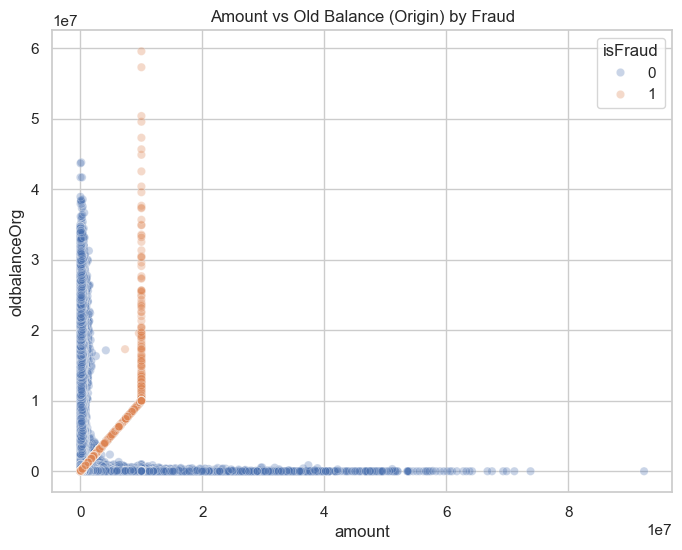

In [48]:
# 1. Amount vs OldbalanceOrg, colored by fraud
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='amount', y='oldbalanceOrg', hue='isFraud', alpha=0.3)
plt.title('Amount vs Old Balance (Origin) by Fraud')
plt.show()

### **Observations**
**Amount vs Old Balance (Origin) by Fraud**
- What it shows: Scatter plot of transaction amount vs. origin account's old balance, colored by fraud status.
- **Insight**: Fraudulent transactions often cluster around low or zero balances, suggesting sudden transfers from empty accounts.

C:\Users\myoge\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


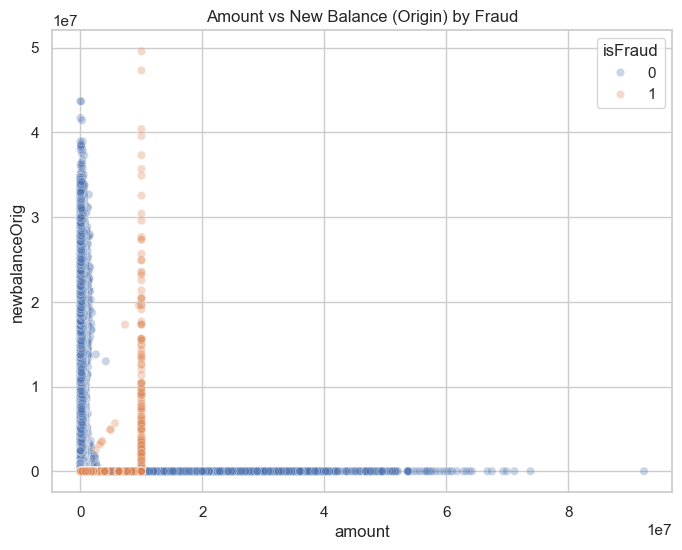

In [56]:
# 2. Amount vs NewbalanceOrig colored by fraud
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = 'amount', y = 'newbalanceOrig', hue = 'isFraud', alpha=0.3)
plt.title("Amount vs New Balance (Origin) by Fraud")
plt.show()

### **Observations**
**Amount vs New Balance (Origin) by Fraud**
- What it shows: Scatter plot of amount vs. new balance after transaction.
- **Insight**: Fraud cases often result in zero new balances—indicating full withdrawal or transfer, which is suspicious.

C:\Users\myoge\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


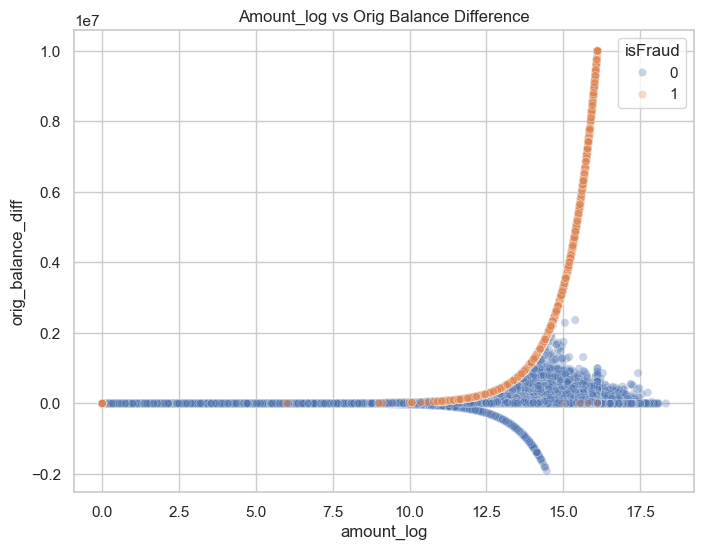

In [57]:
# 3. Amount_log vs orig_balance_diff colored by fraud
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = 'amount_log', y = 'orig_balance_diff', hue = 'isFraud', alpha = 0.3)
plt.title('Amount_log vs Orig Balance Difference')
plt.show()

### **Observations**
**Amount (Log) vs Origin Balance Difference**
What it shows: Log-transformed amount vs. the difference between old and new origin balances.
**Insight**: Helps reveal fraud patterns where the amount equals the full balance difference—common in cash-outs or transfers.

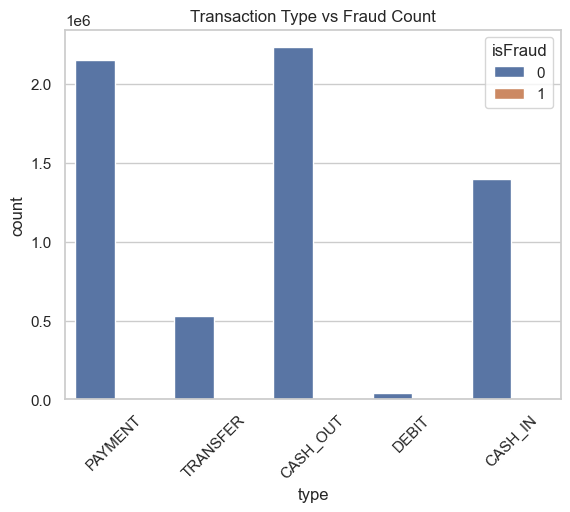

In [58]:
# 4. Countplot for Categorical vs Target
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type vs Fraud Count')
plt.xticks(rotation=45)
plt.show()

### **Observations**
**Transaction Type vs Fraud Count**
- What it shows: Bar chart comparing fraud counts across transaction types.
- **Insight**:  and  dominate fraud cases—these types should be treated as high-risk.

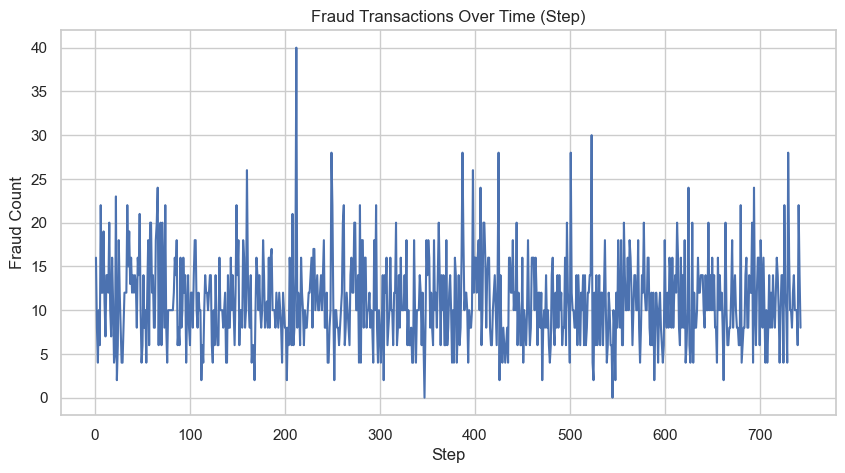

In [59]:
# 5. Line Chart - To find the Trend over the time
fraud_by_step = df.groupby('step')['isFraud'].sum()

plt.figure(figsize=(10, 5))
fraud_by_step.plot()
plt.title('Fraud Transactions Over Time (Step)')
plt.xlabel('Step')
plt.ylabel('Fraud Count')
plt.show()

### **Observations**
**Fraud Transactions Over Time (Step)**
- What it shows: Line chart of fraud counts over time steps.
- **Insight**: Reveals temporal spikes or patterns—could indicate coordinated fraud attempts or system vulnerabilities.

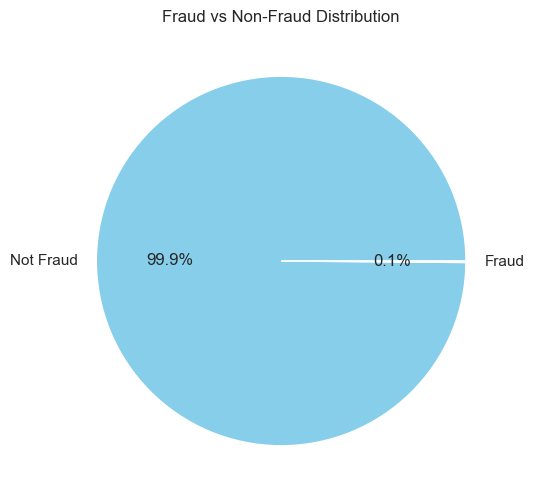

In [60]:
# 6. Pie chart - Fraud vs Non_Fraud Transactions
fraud_counts = df['isFraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()

### **Observations**
**Fraud vs Non-Fraud Distribution**
- What it shows: Pie chart of fraud vs. non-fraud proportions.
- **Insight**: Confirms class imbalance—fraud is rare, which justifies using SMOTE to balance the dataset.

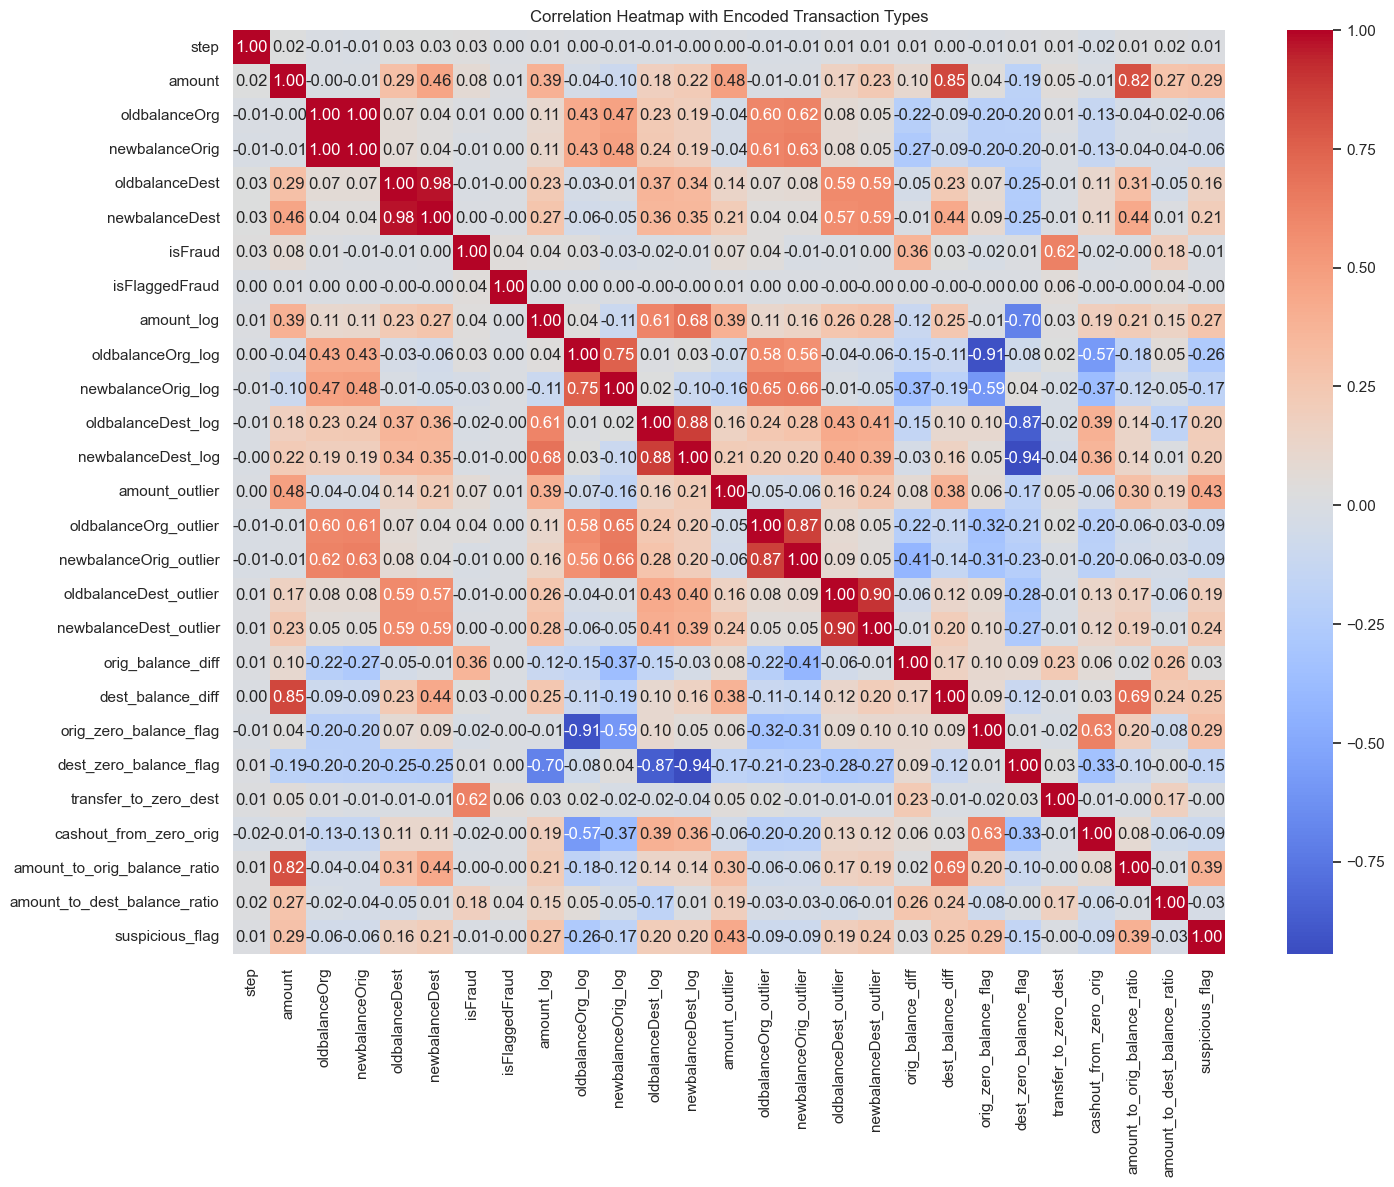

In [61]:
# 7. Heatmap to find the correlation
# One-hot encode 'type'
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
numeric_df = df_encoded.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Transaction Types')
plt.show()

### Observations
- What it shows: This is a correlation heatmap displaying how strongly different transaction-related features are related to each other — positive (red) or negative (blue) correlations.
- **Insight**: Log-transformed features (like amount_log, oldbalanceOrg_log) show strong positive correlations with their original versions, confirming that log transformation preserved relationships while reducing skewness and outlier effects.

In [72]:
# Highly correlated columns from the above Heatmap

# Unstack and filter the correlations
corr_pairs = corr.unstack()

# Remove self-correlations and duplicates
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

# Filter by correlation thresholds
positive_corr = corr_pairs[corr_pairs > 0.8]

# Negitive Correlation thresholds
negitive_corr = corr_pairs[corr_pairs < -0.8]

# Printing the Outputs
print("Positive Correlated Columns")
print("___________________________________")
print(positive_corr)
print("___________________________________")
print("Negitive Correlated Columns")
print("___________________________________")
print(negitive_corr)

Positive Correlated Columns
___________________________________
step                    step                            1.000000
oldbalanceOrg           newbalanceOrig                  0.998803
oldbalanceDest          newbalanceDest                  0.976569
oldbalanceDest_outlier  newbalanceDest_outlier          0.904117
oldbalanceDest_log      newbalanceDest_log              0.877273
oldbalanceOrg_outlier   newbalanceOrig_outlier          0.865418
amount                  dest_balance_diff               0.845964
                        amount_to_orig_balance_ratio    0.817079
dtype: float64
___________________________________
Negitive Correlated Columns
___________________________________
oldbalanceDest_log  dest_zero_balance_flag   -0.866191
oldbalanceOrg_log   orig_zero_balance_flag   -0.914304
newbalanceDest_log  dest_zero_balance_flag   -0.944563
dtype: float64


### Observations
- From the above we have separated **Positively Correlated** Columns and **Negitive Correlated** Columns, based on **Heatmap** (which is having Correlation greater than 80%)

In [74]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_log', 'oldbalanceOrg_log',
       'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log',
       'amount_outlier', 'oldbalanceOrg_outlier', 'newbalanceOrig_outlier',
       'oldbalanceDest_outlier', 'newbalanceDest_outlier', 'orig_balance_diff',
       'dest_balance_diff', 'orig_zero_balance_flag', 'dest_zero_balance_flag',
       'transfer_to_zero_dest', 'cashout_from_zero_orig',
       'amount_to_orig_balance_ratio', 'amount_to_dest_balance_ratio',
       'suspicious_flag'],
      dtype='object')

### 3.8 Data Balancing:

In [76]:
# count numbers fraud transactions in isFraud column
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### **Observations**
- The dataset is highly imbalanced, with approximately **63,54,407 million non-fraudulent (0) transactions** and only **8,213 fraudulent (1) transactions**.
- To address this imbalance, **SMOTE (Synthetic Minority Oversampling Technique)** was applied on the training dataset (80% of the total data) to generate synthetic samples of the minority class and ensure balanced class distribution for better model learning.

### Applying SMOTE (Synthetic Minority Oversampling Technique)

In [78]:
# Now we need to balance the isFraud column using the SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Step1: Separate features and Target
X = df.drop(['isFraud','isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# Encode the Type column
X = pd.get_dummies(X, columns = ['type'], drop_first = True)
print("Before balancing: ", Counter(y))

# Step2: Train Test and Split Before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Step3: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step4: Apply smote only for Training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print("After Balancing: ", Counter(y_train_resampled))

Before balancing:  Counter({0: 6354407, 1: 8213})
After Balancing:  Counter({0: 5083526, 1: 5083526})


# Train Test Split
X_train, Y_train, X_test, Y_test

X_train = 5 Million rows (Features except ISFraud column)|
Y_train = 5 Million rows (target only isFraud column)|
X_test = 1.3 Million rows (Features except ISfraud column)
y_test = 1.3 Million rows (Target only isFraud column)

In [80]:
# Convert resampled training data back into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns = X.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name = 'isFraud')

# Combine features and target into one DataFrame
new_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

### **Observations**
- We have successfully applied **SMOTE** on our **training dataset**, and we have printed results **before SMOTE and After SMOTE**
- Converted Results into again dataframe, to make easy access of quick functions like info, columns and many more

## 4. Supervised Machine Learning algorithms - RandomForest and XGBoost

### 4.1 RandomForest Model

In [82]:
# Now train the model using the RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Predict on test set
y_pred = rf_model.predict(X_test_scaled) # X_train or Y_train or y_test
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Step 3: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[1268736    2145]
 [     24    1619]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.43      0.99      0.60      1643

    accuracy                           1.00   1272524
   macro avg       0.72      0.99      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC Score: 0.9994896325849857


In [84]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

F1_Score = f1_score(y_test, y_pred)
print("F1 Score: ", F1_Score)

recall = recall_score(y_test, y_pred)
print("Recall value: ", recall)

Accuracy:  0.9982955134834393
Precision:  0.4301275239107333
F1 Score:  0.5988533382652118
Recall value:  0.985392574558734



Confusion Matrix: 
 [[1268736    2145]
 [     24    1619]]


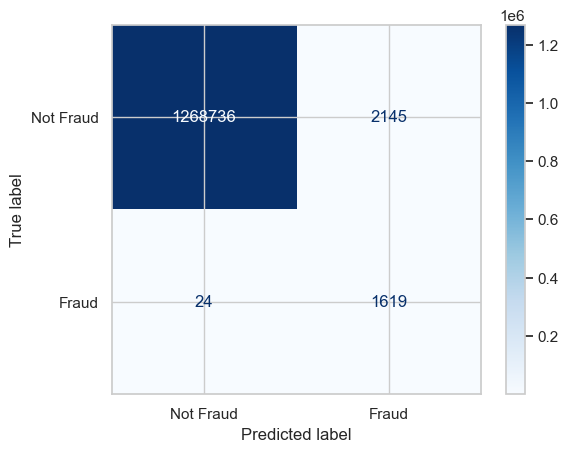

In [86]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not Fraud', 'Fraud'])
disp.plot(cmap = 'Blues', values_format = 'd')

### **Observation1**
- In the Separate notebook, I've run the RandomForest Algorithm, with the treating the Outliers
- I've done **Hyperparameter Tuning like n_estimators = 100, max_depth = 20, n_jobs = -1**. When I run the Model with these values, I got Precision as Very low (35%), recall(98%),F1 score 52(%), and accuracy(99.76%). It give Confusion matrix values as [1267895 True Negitives, 2986 False Positives, 29 False Negitives, 1614 True Positives]

### **Observation2 - After handling Outliers with the LogTransformation**
- I've done **Hyperparameter Tuning like n_estimators = 50, max_depth = 10, n_jobs = 1**. When I run model with these values, I got Precision is very low(37%), recall(97%),F1 score 55(%), and accuracy(99.78%). It give Confusion matrix values as [1268308 True Negitives, 2574 False Positives, 26 False Negitives, 1616 True Positives]

### **Observation3 - After handling Outliers with the LogTransformation**
- I've done **Hyperparameter tuning like n_estimators = 100, max_depth = 20, n_jobs = -1**. When I run model with these values, I got Precision (43%), recall(99%),F1 score 60(%), and accuracy(99.82%). It give Confusion matrix values as [1268736 True Negitives, 2145 False Positives, 24 False Negitives 1619, True Positives]

- **Final Verdict**: From the above observations we can see, the 3rd observation predicted more **Legitimate transactions True Negitives**, Less **False Positives** compare with the remaining two observations, and more **true positives** than the reaming two observations

    - **Note**: Due to limited Computing power and disk space, I've removed the third observation
    - **Caution**: The above mentioned **RandomForest** model with the mentioned Hypermeters, it have taken to exexute each observation almost 30 Minutes to 90 Minutes

### 4.2 RandomForest with the RandamizedSearchCV

In [88]:
# Now Performing RandomForest with the RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # Try 10 random combinations
    cv=2,
    scoring='f1',  # Focus on fraud class performance - Here you can add 'Precision' also
    verbose=2,
    n_jobs=1
)

# Sample 100,000 rows for tuning
sample_idx = np.random.choice(len(X_train_resampled), size=500000, replace=False)
X_sample = X_train_resampled[sample_idx]
y_sample = y_train_resampled[sample_idx]

# Fit RandomizedSearchCV on sample
random_search.fit(X_sample, y_sample)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  21.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  20.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  18.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  19.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  38.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  39.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  20.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   scoring='f1', verbose=2)

In [90]:
# Get the best model
best_rf = random_search.best_estimator_

# Predict on full test set
y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
 [[1265526    5355]
 [      4    1639]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.23      1.00      0.38      1643

    accuracy                           1.00   1272524
   macro avg       0.62      1.00      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC Score: 0.9994776681155189


### **Observations**
- After RandomForest Model, we performed RandomForest with the RandomizedSearchCV with Hyperparameter Tuning values
- Due to Extreme memory requirement, and more computing resourses, I've reduced size of Hyperparameters like this
    - n_estimators = [50, 100], max_depth = [10, 15], min_sample_split = [2, 5], min_sample_leaf = [1, 2], max_features = ['sqrt']. along with these I've used limited size values of RandomSearch variable size: n_iter = 5, cv = 2, scoring = 'f1',
- With these values I got very low precision (23%), Low F1 Score(37%).
- We can update these Hyperparameters, and RandomSearch Variables, to improve Precision and F1 score, but **Beware it takes more time, and Computing resourses**
- Try using these Hyperparameters: n_estimators = [50, 100, 150], max_depth = [10, 15, 20], min_sample_split = [2, 5, 10], min_sample_leaf = [1, 2, 4], max_features = ['sqrt', 'log2'], and RandomSearch variable size: n_iter = 10, cv = 4, scoring = 'precision'

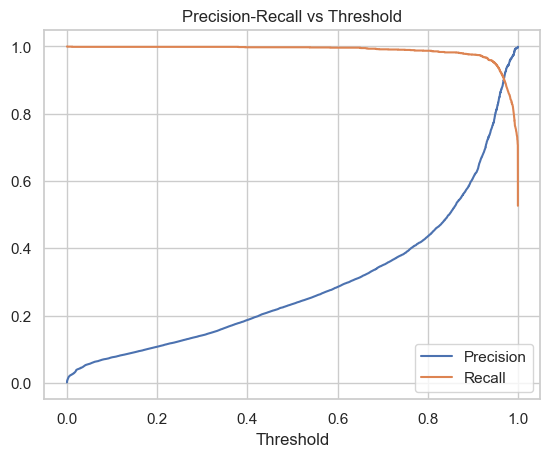

In [92]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Plot precision vs threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

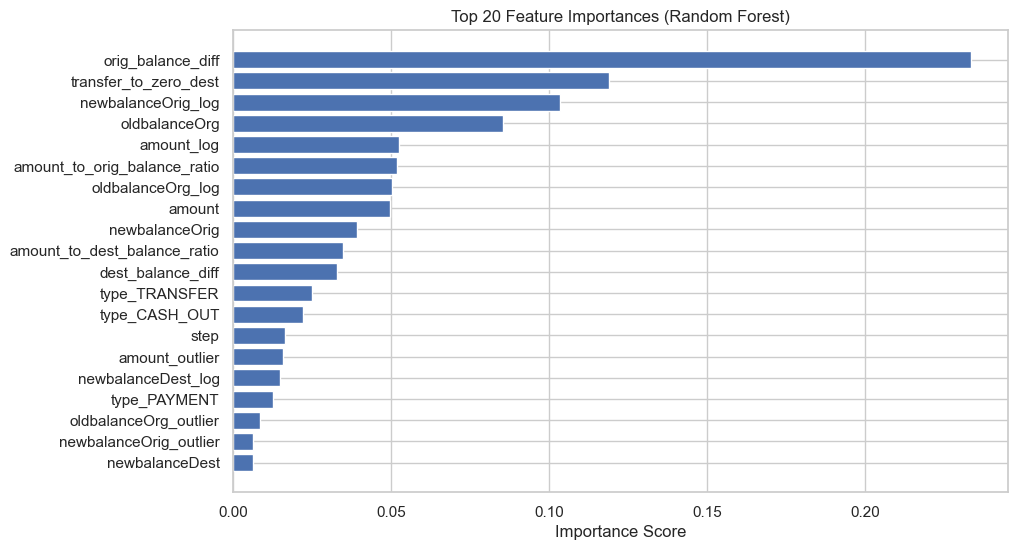

In [94]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20], feat_imp_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

### **Observations**
- Precision-Recall vs Threshold: plot shows how precision (blue) and recall (orange) change as the decision threshold varies.
- As the threshold increases, precision improves (fewer false positives) but recall drops (more false negatives).
It helps identify the optimal threshold where both precision and recall are reasonably balanced for fraud detection.
- In the above we can see top importent features. Those are, **Orig_balance_diff, transfer_to_zero_dest, oldbalanceOrg, newbalanceOriglog** plays a crucial role

### 4.3 XGBoost Model

In [96]:
# Now use XGBoost

# Import and Initialize
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit on SMOTE and balanced data
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

C:\Users\myoge\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:28:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[1269149    1732]
 [      2    1641]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.49      1.00      0.65      1643

    accuracy                           1.00   1272524
   macro avg       0.74      1.00      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC Score: 0.9996133375127011


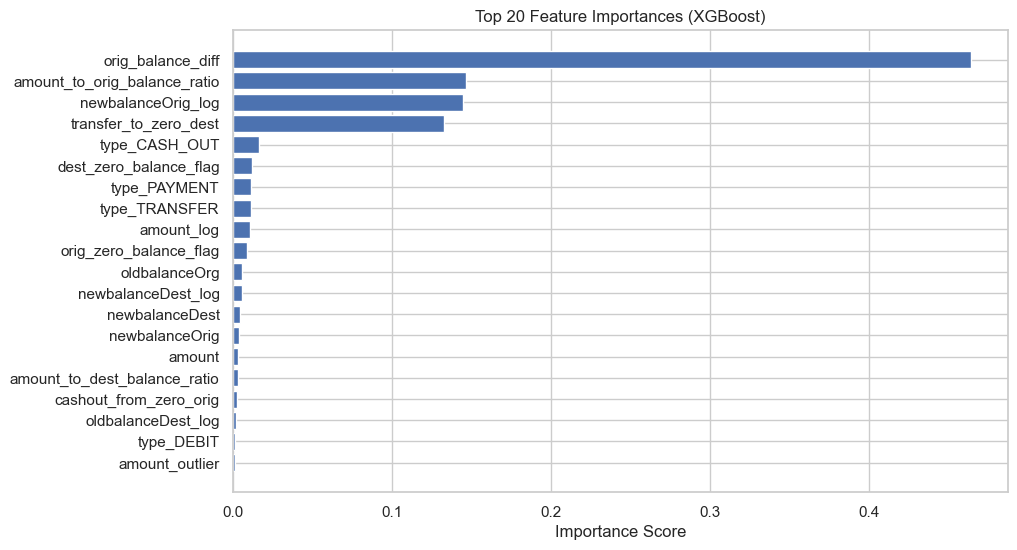

In [98]:
# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20], feat_imp_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance Score')
plt.show()

### **Observations**
- While comparing with the RandomForest, RandomizedSearchCV, XGBoost model have high Precision and High Recall values. See the confusion Matrix below
    - Confusion Matrix: [1269149 True Negitives, 1732 False Positives, 2 False Negitives, and 1641 True Positives].
- Precision (49%), Recall (99%), and F1 score (65%)
- **Final Verdict**:
    - In XGBoost model we have more precision then the RandomForest, and RandomizedSearchCV, Highest recall, and good F1 score.
    - Also the confusion matrix shows less number of False Positives compare with the RandomForest, and RandomizedSearchCV models, and very low False Negitives. This is Good fit model according to the Confusion Matrix

## 5. UnSuperVised - Learning Algorithm

### 5.1 Isolation Forest

In [153]:
# 1. Isolation Forest

# Import and Initialize
from sklearn.ensemble import IsolationForest

# Initialize model
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.001,  # Approximate fraud rate
    random_state=42
)

# Fit on scaled features
iso_forest.fit(X_test_scaled)

# Predict Anomalies
# Predict: -1 = anomaly, 1 = normal
y_pred_iso = iso_forest.predict(X_test_scaled)

# Convert to binary: 1 = fraud, 0 = non-fraud
y_pred_iso_binary = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate againest true labels
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_iso_binary))
# Save anomaly scores for hybrid model
anomaly_scores = iso_forest.decision_function(X_test_scaled)

Confusion Matrix:
 [[1269642    1239]
 [   1619      24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.02      0.01      0.02      1643

    accuracy                           1.00   1272524
   macro avg       0.51      0.51      0.51   1272524
weighted avg       1.00      1.00      1.00   1272524



In [102]:
# For the above code, we have very less recall and precision values, 
# so we are changing the  Estimators from 100 to 200, and contamination from 0.001 to 0.01

# Import and Initialize
from sklearn.ensemble import IsolationForest

# Initialize model
iso_forest = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=0.01,  # Approximate fraud rate = 0.01 = 63K, but actually we have frauds just 8.2k
    random_state=42
)

# Fit on scaled features
iso_forest.fit(X_test_scaled)

# Predict Anomalies
# Predict: -1 = anomaly, 1 = normal
y_pred_iso = iso_forest.predict(X_test_scaled)

# Convert to binary: 1 = fraud, 0 = non-fraud
y_pred_iso_binary = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate againest true labels
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_iso_binary))

Confusion Matrix:
 [[1258626   12255]
 [   1172     471]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.04      0.29      0.07      1643

    accuracy                           0.99   1272524
   macro avg       0.52      0.64      0.53   1272524
weighted avg       1.00      0.99      0.99   1272524



### **Observation1**
- We run the IsolationForest model with the following Parameters
    - n_estimators = 100, and contamination = 0.001. For these parameters we got very low Precision (2% only), recall (1%) and F1 score (2%)
- **Confusion Matrix**: [1269642 True Negitives, 1239 False Positives, 1619 False Positives, 24 True positives]
- **From the above we can understand the model is under_performing**

### **Observation2**
- For the better precision I've increased hyperparameters values, these are:
    - n_estimators = 200, and contamination = 0.01. For these parameters we got very low Precision (4% only), recall (29%) and F1 score (7%)
- **Confusion Matrix**: [1258626 True Negitives, 12255 False Positives,  1172 False Positives, 471 True positives]
- **From the above we can see more number of 'False Positives' are increased extremely. It means Model is performed under_performing**

In [ ]:
# We use these values as a Supervised learning model Features
scores = iso_forest.decision_function(X_test_scaled)

### **5.2 K-Means Clustering Model**

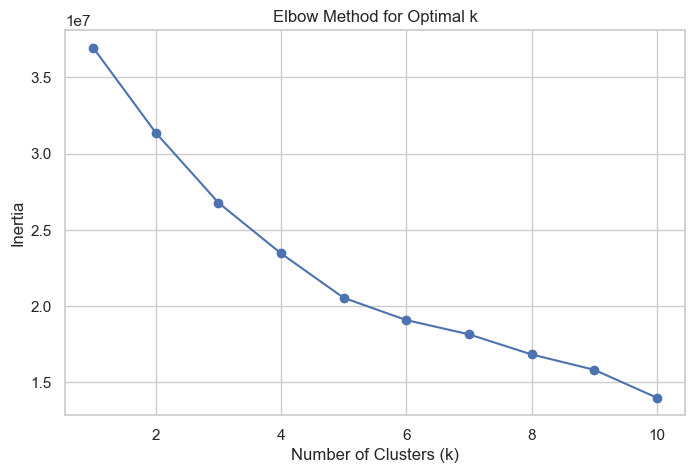

In [104]:
# K-means (Elbow) Algorithm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Already scaled: X_test_scaled

# Elbow method to find optimal k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_test_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [106]:
# Fits K-means with the Optimal K
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_test_scaled)

# Analyze Fraud Distribution by cluster

# Combine cluster labels with true fraud labels
cluster_df = pd.DataFrame(X_test_scaled)
cluster_df['Cluster'] = cluster_labels
cluster_df['isFraud'] = y_test.reset_index(drop=True)

# Fraud count per cluster
fraud_by_cluster = cluster_df.groupby('Cluster')['isFraud'].value_counts().unstack().fillna(0)
print(fraud_by_cluster)

isFraud         0       1
Cluster                  
0        461015.0    21.0
1        264810.0     7.0
2        357687.0  1615.0
3        187369.0     0.0


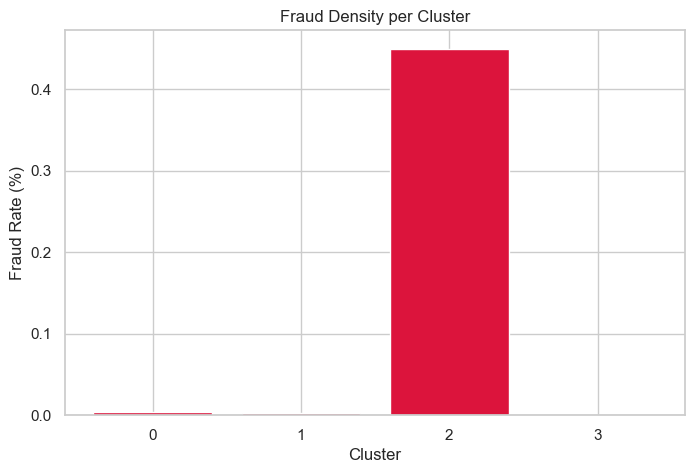

In [108]:
# Visualize Fraud Density per cluster - Prepare data
fraud_counts = fraud_by_cluster[1]  # Fraud column
total_counts = fraud_by_cluster.sum(axis=1)
fraud_density = (fraud_counts / total_counts) * 100

# Plot
plt.figure(figsize=(8, 5))
plt.bar(fraud_density.index, fraud_density.values, color='crimson')
plt.xlabel('Cluster')
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Density per Cluster')
plt.xticks(fraud_density.index)
plt.grid(True)
plt.show()

### **Observations**
- **Elbow method for Optimal K**: This Elbow Method plot shows how the model’s inertia (within-cluster variance) decreases as the number of clusters (k) increases. The “elbow point” — where the curve starts to flatten (around k = 4 or 5) — indicates the optimal number of clusters for the data.
- We have applied K-Means Clustering for only **1.25 Millions** rows. Here **n_clusters = 4** only.  In the Output we can see that the **cluster 2** is having more **fraud transactions**. So we need to keep an eye on the cluster 2.
- After the cluster 2, we can see more fraud transactions are there in the **cluster 0**

### 5.2.1 We are now applying K-Means Clustering for the Full Dataset

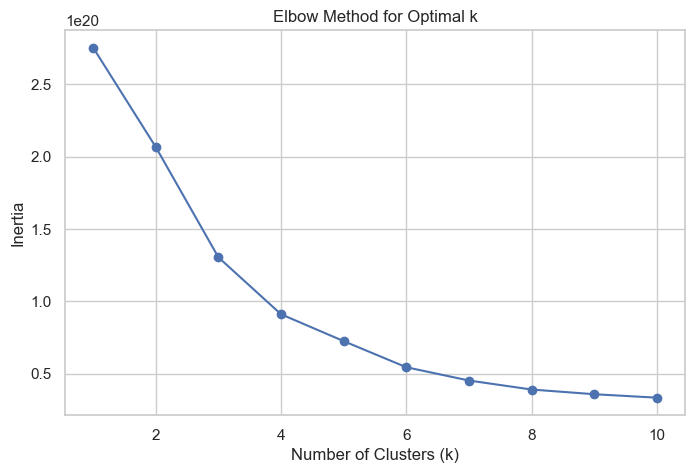

In [110]:
# K-means with the Full Dataframe
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Already scaled: X_test_scaled

df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Drop 'type' and any other non-numeric columns
df_numeric = df_encoded.select_dtypes(include=['number'])

# Elbow method to find optimal k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [112]:
# K-Means with the Full data 6.3 Million rows
# Fits K-means with the Optimal K
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(df_numeric.drop(columns=['isFraud']))  # Exclude label column

# Combine cluster labels with true fraud labels
cluster_df = df_numeric.copy()
cluster_df['Cluster'] = cluster_labels

# Confirm shape and missing values
print(cluster_df.shape)
print(cluster_df['isFraud'].isna().sum())  # Should be 0

# Fraud count per cluster
fraud_by_cluster = cluster_df.groupby('Cluster')['isFraud'].value_counts().unstack().fillna(0)
print(fraud_by_cluster)

(6362620, 28)
0
isFraud        0     1
Cluster               
0        5079975  6896
1         360981   158
2         154539   136
3         650799   945
4           1477     1
5          87787    64
6          18849    13


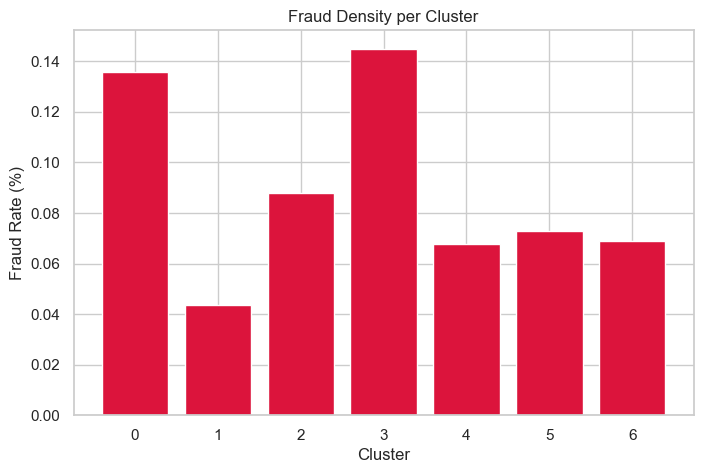

In [114]:
# Visualize Fraud Density per cluster - Prepare data
fraud_counts = fraud_by_cluster[1]  # Fraud column
total_counts = fraud_by_cluster.sum(axis=1)
fraud_density = (fraud_counts / total_counts) * 100

# Plot
plt.figure(figsize=(8, 5))
plt.bar(fraud_density.index, fraud_density.values, color='crimson')
plt.xlabel('Cluster')
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Density per Cluster')
plt.xticks(fraud_density.index)
plt.grid(True)
plt.show()

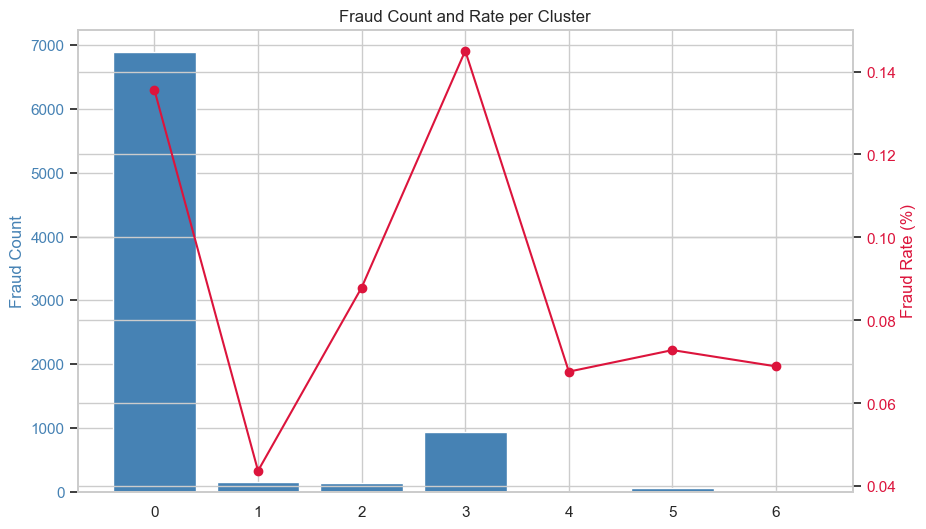

In [116]:
# Plot both fraud count and fraud rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# Fraud count
ax1.bar(fraud_by_cluster.index, fraud_counts, color='steelblue', label='Fraud Count')
ax1.set_ylabel('Fraud Count', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Fraud rate (secondary axis)
ax2 = ax1.twinx()
ax2.plot(fraud_density.index, fraud_density.values, color='crimson', marker='o', label='Fraud Rate (%)')
ax2.set_ylabel('Fraud Rate (%)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Fraud Count and Rate per Cluster')
plt.xlabel('Cluster')
plt.grid(True)
plt.show()

### **Observations**
- Now we are applying the K-Means Clustering to the Enttire Dataset with the 6.3 Million Rows.
- **Elbow method for Optimal K**: This Elbow Method plot shows how the model’s inertia (within-cluster variance) decreases as the number of clusters (k) increases. The “elbow point” — where the curve starts to flatten (around k = 4 or 5) — indicates the optimal number of clusters for the data.
- Here we have selected n_clusters = 7, to reduce the complexity of the code, while running the model
- In the **cluster 0** we can see more number of fraud transactions are there. So Keep an eye on the **cluster 0**. After this we can see **cluster 3** have more fraud transactions. After **cluster 1**
- **Fraud count and fraud rate per cluster**: The above chart shows that Cluster 0 has the highest number of fraud cases, while Cluster 3 has the highest fraud rate percentage, despite fewer total cases.
- It suggests that fraud patterns are not evenly distributed, and certain clusters are more prone to fraudulent activity.

### 5.3 Simple Logistic Regression with Anomaly Score Feature
- We are using Features from Isolation Forest

In [118]:
# Get anomaly scores from Isolation Forest
anomaly_scores_train = iso_forest.decision_function(X_train_scaled)
anomaly_scores_test = iso_forest.decision_function(X_test_scaled)

# Append to feature matrix - Reshape and concatenate
X_train_hybrid = np.hstack((X_train_scaled, anomaly_scores_train.reshape(-1, 1)))
X_test_hybrid = np.hstack((X_test_scaled, anomaly_scores_test.reshape(-1, 1)))

# Train logistic Regresssion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train_hybrid, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [120]:
# Predict and Evaluate
y_pred_log = log_reg.predict(X_test_hybrid)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Confusion Matrix:
 [[1244002   26879]
 [      7    1636]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      1.00      0.11      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.99      0.55   1272524
weighted avg       1.00      0.98      0.99   1272524



### **Observations**
- We have used Isolation Forest features for performing Simple Logistic Regression, on the test data which we have 1.25 Million rows approximately
- In the logistic regression, we have used following Hyperparameters: max_iter = 1000, class_width = 'balanced'
- In the Simple Logistic Regression, we have less precision (6%) only, recall(99%), and f1 score is also very less (11%) only.
- The **Confusion Matrix**: [1244002 True Negitives, 26879 False Positives, 7 False Negitives, and 1636 True Positives]. Here model see the Simple Logistic Regression model predicted more False positives. It means **Legitimate transactions also, predicted as False transactions**.

### 5.4 Unsupervised – Autoencoder model

In [ ]:
## AutoEncoder - Code here

#### Here I need to do UnSupervised-Auto Encoder, but it needs GPU processor, otherwise it will take 4 to 6 hours to run the code
- So I've Run this UnSupervised-Auto Encoder in Google colab, and in Hybrid model, I'm not including 'UnSupervised-Auto Encoder'**

## **6. Hybrid Model**

### 6.1 Inlcudes Supervised and Unsupervised Learning algorithms

In [124]:
# Step1: Create a Base features 

# Drop label column and scale features
X_base = df_numeric.drop(columns=['isFraud'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_base)

# Step2: Add cluster labels
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step3: Add Isolation forest score
iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_scaled)
anomaly_scores = iso_forest.decision_function(X_scaled)

# Step4: Combine all Features
X_hybrid = np.hstack((
    X_scaled,
    cluster_labels.reshape(-1, 1),
    anomaly_scores.reshape(-1, 1)
))

y_hybrid = df_numeric['isFraud'].values

In [125]:
# Step5: Train Final model (Logistic Regression)
X_train, X_test, y_train, y_test = train_test_split(X_hybrid, y_hybrid, test_size=0.2, random_state=42, stratify=y_hybrid)

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1259086   11795]
 [      4    1639]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.12      1.00      0.22      1643

    accuracy                           0.99   1272524
   macro avg       0.56      0.99      0.61   1272524
weighted avg       1.00      0.99      0.99   1272524



### **Observation**
- In the Hybrid machine learning model, we are included
    - **Logistic Regression - Supervised Learning Model**
    - **K-Means Clustering - Unsupervised Learning Model**
    - **Isolation Forest - Unsupervised Learning Model**
- Ultimately we have build our model on Logistic Regression
- In the Hybrid model we got the precision (12%), Recall(99%), F1 Score(22%).
- **Confusion Matrix**: [1259086 True Negitives, 11795 False Positives, 4 False Negitives, and 1639 True Positives]. Here in the hybrid model, we can see the Logistic Regression model predicted more False positives. It means Legitimate transactions also, predicted as False transactions.
- **Ultimately Hybrid model is not performing well** (based on Confusion Matrix)

### 6.3 Hybrid - XGBoost Model

In [128]:
# For better Performance - We are using XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=100, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Confusion Matrix:
 [[1270389     492]
 [     33    1610]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.77      0.98      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.88      0.99      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



### **Observations**
- In the Hybrid XGBoost model, we can see Precision, Recall, and F1-Score increased
- The Hybrid XGBoost Model Precision (77%), Recall (98%), F1-Score (86%), and We can see better Confusion Matrix values also
- **Confusion Matrix**: [1270389 True Negitives, 492 False Positives, 33 False Negitives, and 1610 True Positives]. Here in the hybrid model, we can see the XGBoost Regression model predicted very **less (492) False positives**, comparing with the all the other machine learning models
- The negotiable number of **False Negitives (33 only)** is not a very bad sign of this model. It can not predicted actual fraud transactions. In realworld, it can be accepted.

## **Final Verdict**: 
#### As per our goal we have see the **Hybrid XGBoost** is having high Precision, F1 score, and Recall values comparing with the all the other Supervised, and Un-Supervised, and Hybrid Machine learning Model, with the very less number of **False Positice** transactions

### **Save the Final Results into CSV file for the Visualization and Reporting Purpose**

In [189]:
# 1. Separate Features and Target
X_full = new_df.drop(columns=['isFraud'])
y_full = new_df['isFraud']

# 2. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# 3. Apply K-Means and Isolation Forest
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

iso_forest = IsolationForest(contamination=0.001, random_state=42)
anomaly_scores = iso_forest.fit(X_scaled).decision_function(X_scaled)

# 4. Build Feature Matrix
X_hybrid = np.hstack((
    X_scaled,
    cluster_labels.reshape(-1, 1),
    anomaly_scores.reshape(-1, 1)
))

# 5. Train or Load XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_hybrid, y_full)

# 6. Predict and Export
y_pred = xgb_model.predict(X_hybrid)
fraud_prob = xgb_model.predict_proba(X_hybrid)[:, 1]

df_output = X_full.copy()
df_output['cluster_label'] = cluster_labels
df_output['anomaly_score'] = anomaly_scores
df_output['isFraud_predicted'] = y_pred
df_output['fraud_probability'] = fraud_prob

df_output.to_csv('JP_Morgan_fraud_detection_output.csv', index=False)
print("✅ Final output saved to 'JP_Morgan_fraud_detection_output.csv'")

✅ Final output saved to 'JP_Morgan_fraud_detection_output.csv'


#### **Note**: 
> #### Remember the above 'JP_Morgan_fraud_detection_output.csv' file have 10 Million Plus rows, because, After applying the SMOTE (for balancing Fraud and Non-Fraud transactions), the ctual dataset size was increased. So the the above file have 10 Million plus rows and 30+ columns

### Save the Individual model.
#### 1. Scaler

In [134]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
scaler.fit(X_base)  # or X_train

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#### 2. K-Means Clustering

In [137]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)

joblib.dump(kmeans, 'kmeans.pkl')

['kmeans.pkl']

#### 3. Isolation Forest

In [140]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_scaled)

joblib.dump(iso_forest, 'isolation_forest.pkl')

['isolation_forest.pkl']

#### 4. XGBoost Model

In [143]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=100, random_state=42)
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

#### 5. Save the complete Pipeline as a Single File

In [150]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', scaler),
    ('kmeans', kmeans),  # custom transformer if needed
    ('iso', iso_forest),
    ('xgb', xgb_model)
])

joblib.dump(pipe, 'full_pipeline.pkl')

['full_pipeline.pkl']

# **Final Summary - About the Project**

> #### This project builds a modular fraud detection system using both supervised and unsupervised learning. While the current implementation focuses on batch-mode detection using historical data, the architecture is designed to scale into a real-time anomaly detection pipeline. By integrating KMeans clustering and Isolation Forest anomaly scores into an XGBoost classifier, the model achieves high precision and recall, making it suitable for deployment in environments where early fraud detection and alerting are critical.

## 7. Connect out model to Realworld-Live data from Azure Blob Storage Account
**Note**: Do not run the below code, we don't have the live data conncetion from Azure or Any other Cloud storage service provider

In [8]:
pip install azure-storage-blob xgboost scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


### 7.1 Connect to Azure Blob Storage

In [ ]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
import io

# Azure credentials
connection_string = "your_connection_string"
container_name = "your_container_name"
blob_name = "live_transactions.csv"  # or .json

# Connect and read blob
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Download and load data
stream = blob_client.download_blob()
df_live = pd.read_csv(io.BytesIO(stream.readall()))

### 7.2 Preprocess live data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop label if present
if 'isFraud' in df_live.columns:
    df_live = df_live.drop(columns=['isFraud'])

scaler = StandardScaler()
X_live_scaled = scaler.fit_transform(df_live)

### 7.3 Adding K-Means clustering labels

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X_live_scaled)

### 7.4 Adding Isolation Forest scores

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_live_scaled)
anomaly_scores = iso_forest.decision_function(X_live_scaled)

### 7.5 Combine Hybrid Features

In [ ]:
import numpy as np

X_live_hybrid = np.hstack((
    X_live_scaled,
    cluster_labels.reshape(-1, 1),
    anomaly_scores.reshape(-1, 1)
))

### 7.6 Load Trained XGBoost Model and Predict

In [ ]:
import joblib

# Load model
xgb_model = joblib.load("xgboost_hybrid_model.pkl")

# Predict fraud
y_pred_live = xgb_model.predict(X_live_hybrid)

# Flag frauds
df_live['isFraud_predicted'] = y_pred_live
fraud_cases = df_live[df_live['isFraud_predicted'] == 1]

### 7.7 Optional Alerting Logic

In [ ]:
if not fraud_cases.empty:
    print(f"⚠️ {len(fraud_cases)} potential frauds detected!")
    # You can send alerts via email, webhook, or log to dashboard